#### Fast Fourier Transformation (3D)

In [1]:
# This Notebook is planned for future releases.
# TODO: Extend the two dimensional Fast Fourier Transformation Notebook.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.fftpack import fftn, ifftn, fftfreq, fftshift

# Define the Runge function in three dimensions
def runge_function(x, y, z):
    return 1 / (1 + 25 * (x**2 + y**2 + z**2))

# Define the grid
x_nodes = np.linspace(-1, 1, 10)
y_nodes = np.linspace(-1, 1, 10)
z_nodes = np.linspace(-1, 1, 10)
X, Y, Z = np.meshgrid(x_nodes, y_nodes, z_nodes)
W = runge_function(X, Y, Z)

# Perform real FFT
import time 
start1 = time.time()
W_fft = fftn(W)
print(f"time = {int((time.time()-start1)*1e5)/1e2}ms")

time = 0.68ms


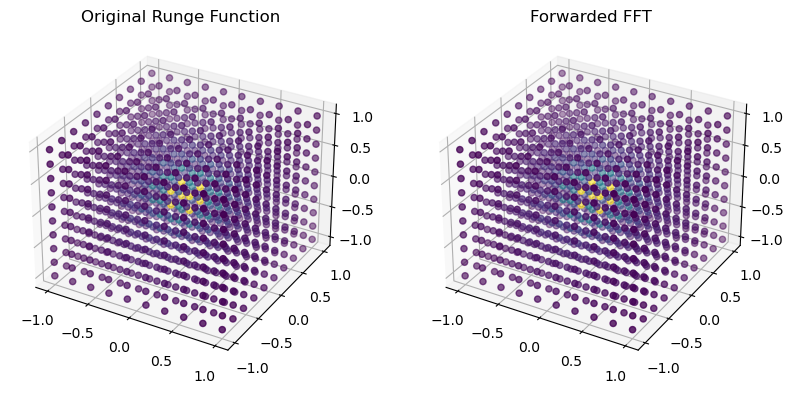

In [3]:

# Frequency values for x, y, and z axes
freq_x = fftfreq(len(x_nodes), d=(x_nodes[1] - x_nodes[0]))
freq_y = fftfreq(len(y_nodes), d=(y_nodes[1] - y_nodes[0]))
freq_z = fftfreq(len(z_nodes), d=(z_nodes[1] - z_nodes[0]))

# Shift the zero frequency components to the center
freq_x = fftshift(freq_x)
freq_y = fftshift(freq_y)
freq_z = fftshift(freq_z)

# Visualize the results
fig = plt.figure(figsize=(15, 5))

# Original Runge function
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X, Y, Z, c=W, cmap='viridis')
ax1.set_title('Original Runge Function')

# Inverse FFT to obtain the reconstructed function
W_reconstructed = ifftn(W_fft).real
ax3 = fig.add_subplot(132, projection='3d')
ax3.scatter(X, Y, Z, c=W_reconstructed, cmap='viridis')
ax3.set_title('Forwarded FFT')

plt.show()